# Greenhouse Gas (GHGs) Emissions, including Indirect CO2, without LULUCF, in kilotonne CO2 equivalent 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Greenhouse Gas (GHGs) Emissions, including Indirect CO2, without LULUCF, in kilotonne CO2 equivalent.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Country or Area,Year,Value
0,Cyprus,2019,8849.599227
1,Cyprus,2018,8819.216843
2,Cyprus,2017,8977.184007
3,Cyprus,2016,8790.713755
4,Cyprus,2015,8343.354184
...,...,...,...
325,Switzerland,1994,52075.390168
326,Switzerland,1993,53094.848180
327,Switzerland,1992,55674.500211
328,Switzerland,1991,55934.033481


In [5]:
df.shape

(330, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  330 non-null    object 
 1   Year             330 non-null    int64  
 2   Value            330 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.9+ KB


In [7]:
df.rename(
    columns={
        'Country or Area': 'Country_or_Area', 
        'Value': 'CO2 emissions (kt)'}, inplace=True) 
df.head() 

,Country_or_Area,Year,CO2 emissions (kt)
0,Cyprus,2019,8849.599227
1,Cyprus,2018,8819.216843
2,Cyprus,2017,8977.184007
3,Cyprus,2016,8790.713755
4,Cyprus,2015,8343.354184


In [8]:
df['Country_or_Area'].value_counts()

Cyprus            30
Czechia           30
Denmark           30
European Union    30
Finland           30
Japan             30
Latvia            30
Netherlands       30
Portugal          30
Slovakia          30
Switzerland       30
Name: Country_or_Area, dtype: int64

In [9]:
df['Year'].value_counts().head()

2019    11
2018    11
1991    11
1992    11
1993    11
Name: Year, dtype: int64

In [10]:
df['CO2 emissions (kt)'].describe()

count    3.300000e+02
mean     6.361214e+05
std      1.426066e+06
min      5.577476e+03
25%      4.978788e+04
50%      7.111171e+04
75%      1.967970e+05
max      5.662307e+06
Name: CO2 emissions (kt), dtype: float64

<AxesSubplot:xlabel='CO2 emissions (kt)', ylabel='Density'>

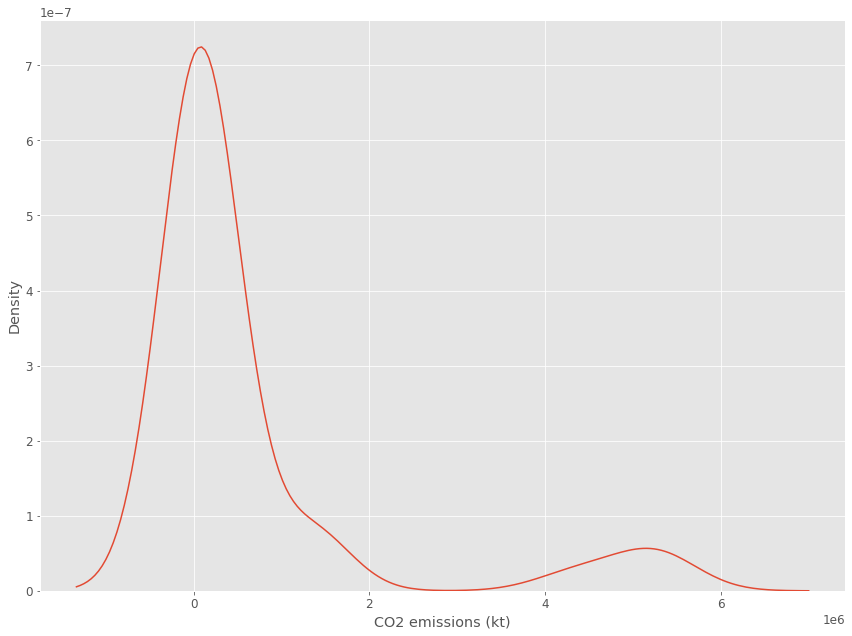

In [11]:
sns.kdeplot(data=df, x='CO2 emissions (kt)')

# Missing Values Exploration

In [12]:
df.isna().sum()

Country_or_Area       0
Year                  0
CO2 emissions (kt)    0
dtype: int64

# Grouping and Aggregation

In [13]:
country_area_grpd = df.groupby('Country_or_Area')
country_area_grpd.head(10)

,Country_or_Area,Year,CO2 emissions (kt)
0,Cyprus,2019,8849.599227
1,Cyprus,2018,8819.216843
2,Cyprus,2017,8977.184007
3,Cyprus,2016,8790.713755
4,Cyprus,2015,8343.354184
...,...,...,...
305,Switzerland,2014,49005.549839
306,Switzerland,2013,52965.077319
307,Switzerland,2012,52084.458804
308,Switzerland,2011,50747.195704


# Data Visualization

In [14]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


# helper function to plot horizontal bar chart 
def plot_hbar(y, width, align='center', xlabel=None, ylabel=None, title=None, color=None, formatter=None):

    # Initialize the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 9))

    # plot bar chart
    ax.barh(
        y=y, width=width,
        align=align)

    # label plot axes
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # labels read top-to-bottom
    ax.invert_yaxis()  

    # set axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    # despine x-axis and y-axis
    sns.despine(left=True, bottom=True)

    return plot_hbar  

In [15]:
agg_emiss_stats = country_area_grpd.agg(
    agg_min = pd.NamedAgg('CO2 emissions (kt)', np.min),
    agg_mean = pd.NamedAgg('CO2 emissions (kt)', np.mean),
    agg_max = pd.NamedAgg('CO2 emissions (kt)', np.max),
    agg_total = pd.NamedAgg('CO2 emissions (kt)', np.sum)
)

agg_emiss_stats

,agg_min,agg_mean,agg_max,agg_total
Country_or_Area,,,,
Cyprus,5.577476e+03,8.273690e+03,1.001710e+04,2.482107e+05
Czechia,1.232976e+05,1.480542e+05,1.989493e+05,4.441626e+06
Denmark,4.608218e+04,6.882955e+04,9.307111e+04,2.064886e+06
European Union,4.059228e+06,4.967389e+06,5.662307e+06,1.490217e+08
Finland,5.307246e+04,6.972750e+04,8.563545e+04,2.091825e+06
Japan,1.211552e+06,1.337538e+06,1.408191e+06,4.012614e+07
Latvia,1.008415e+04,1.257752e+04,2.590869e+04,3.773255e+05
Netherlands,1.808724e+05,2.115337e+05,2.410505e+05,6.346010e+06
Portugal,5.887182e+04,7.157866e+04,8.591692e+04,2.147360e+06


In [16]:
agg_emiss_stats['agg_total'].sort_values(ascending=False).head(10)          # top ten country or area with the highest GHG's emissions

Country_or_Area
European Union    1.490217e+08
Japan             4.012614e+07
Netherlands       6.346010e+06
Czechia           4.441626e+06
Portugal          2.147360e+06
Finland           2.091825e+06
Denmark           2.064886e+06
Switzerland       1.577581e+06
Slovakia          1.477427e+06
Latvia            3.773255e+05
Name: agg_total, dtype: float64

<function __main__.plot_hbar(y, width, align='center', xlabel=None, ylabel=None, title=None, color=None, formatter=None)>

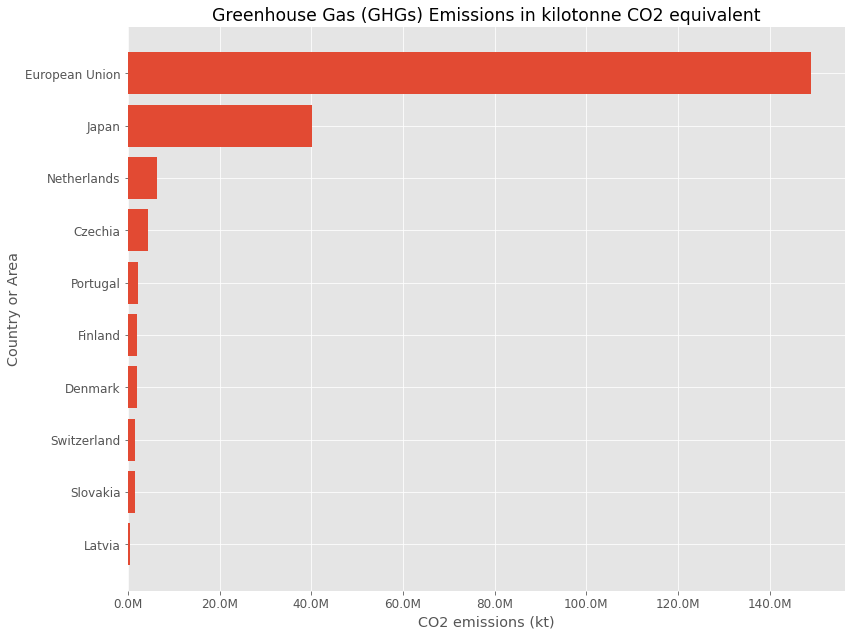

In [17]:
top_10_emiss = agg_emiss_stats['agg_total'].sort_values(ascending=False).head(10) 

plot_hbar(
    y=top_10_emiss.keys(), width=top_10_emiss.values,
    xlabel='CO2 emissions (kt)', ylabel='Country or Area', title='Greenhouse Gas (GHGs) Emissions in kilotonne CO2 equivalent',
    formatter=format_mill
)

In [18]:
def plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y,
        hue=hue, size=size, style=style, 
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine axis
    sns.despine(bottom=True, left=True)

    return plot_line

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

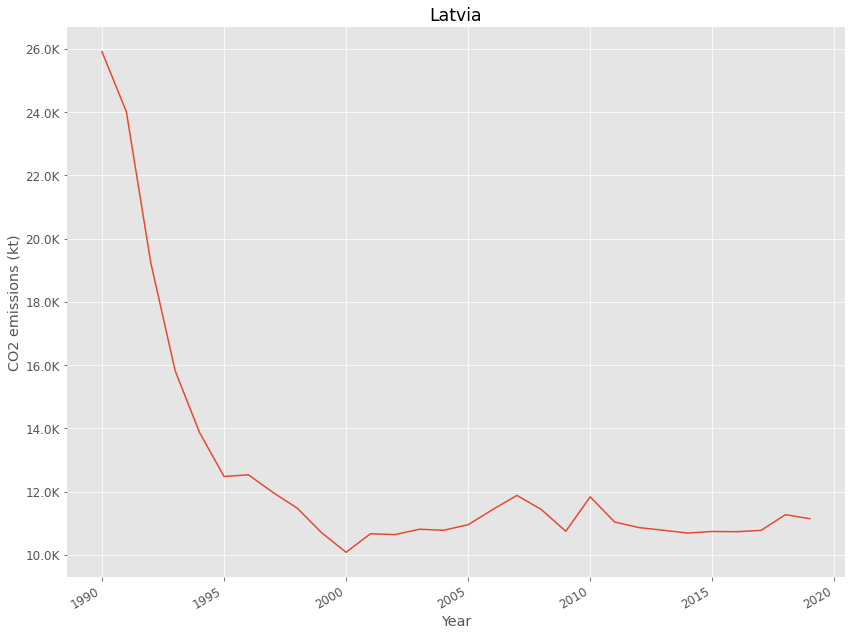

In [19]:
plot_line(
    data=country_area_grpd.get_group('Latvia'),
    x='Year', y='CO2 emissions (kt)',
    title='Latvia', xlabel='Year', ylabel='CO2 emissions (kt)',
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

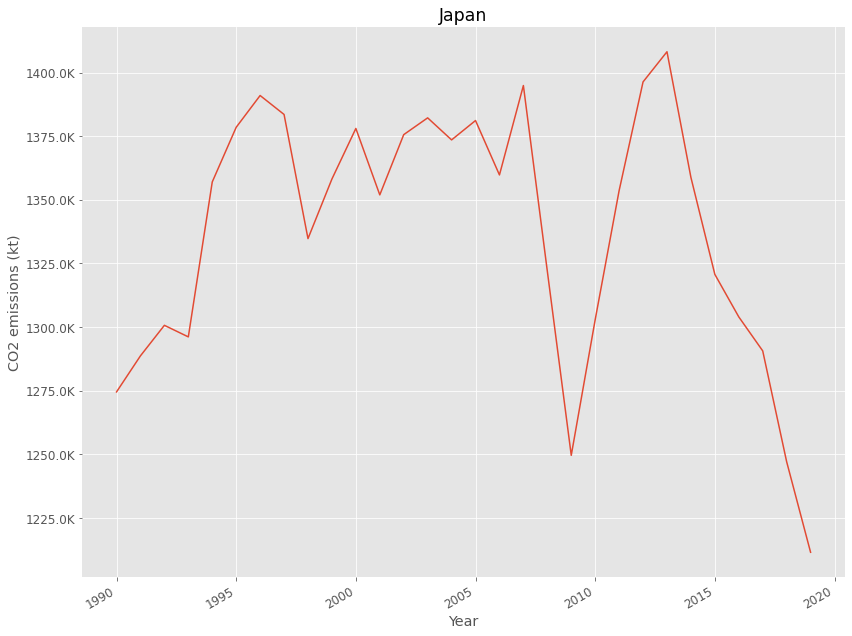

In [20]:
plot_line(
    data=country_area_grpd.get_group('Japan'),
    x='Year', y='CO2 emissions (kt)',
    title='Japan', xlabel='Year', ylabel='CO2 emissions (kt)',
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

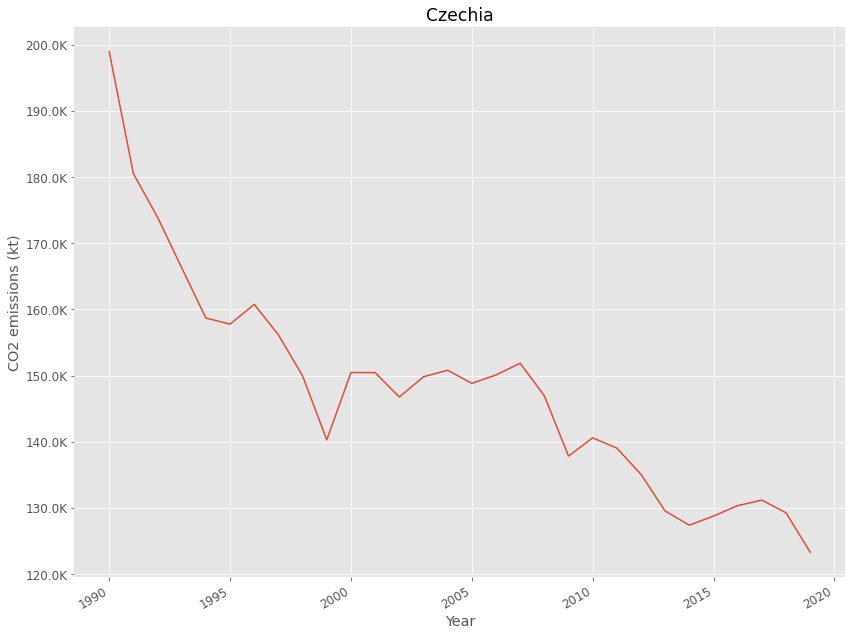

In [21]:
plot_line(
    data=country_area_grpd.get_group('Czechia'),
    x='Year', y='CO2 emissions (kt)',
    title='Czechia', xlabel='Year', ylabel='CO2 emissions (kt)',
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

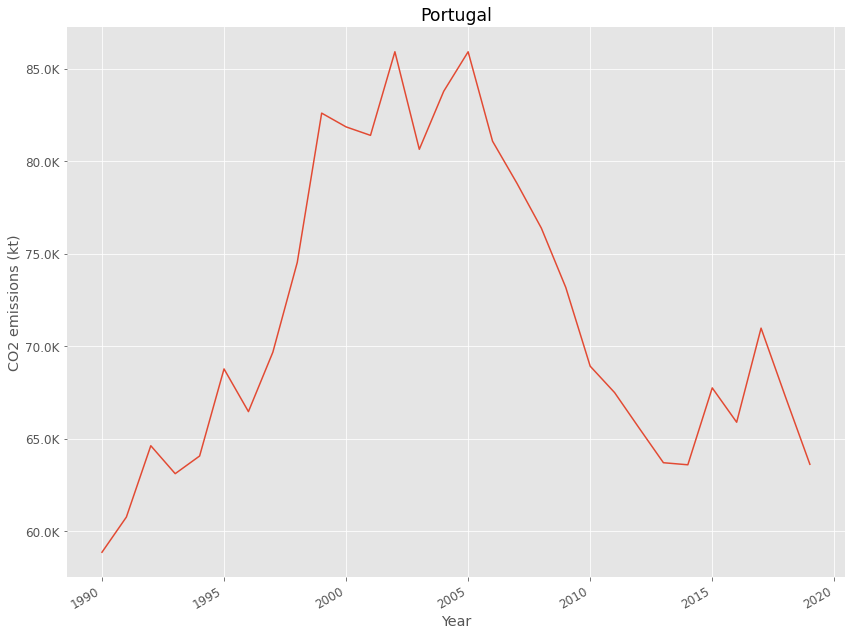

In [22]:
plot_line(
    data=country_area_grpd.get_group('Portugal'),
    x='Year', y='CO2 emissions (kt)',
    title='Portugal', xlabel='Year', ylabel='CO2 emissions (kt)',
    formatter=format_tsd
)